<a href="https://colab.research.google.com/github/RemyaRS/Machine_Learning_Case_Studies/blob/main/ML1_Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries needed

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Filter warnings
warnings.filterwarnings('ignore')

#To retrive the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/mushrooms.csv')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

Dataset Link : https://www.kaggle.com/uciml/mushroom-classification

#Data Exploration

To find number of rows and coloumns in a dataset

In [ ]:
dataset.shape

(8124, 23)

So there are 8124 rows and 23 coloumns in the dataset

In [ ]:
print("Names of coloumns are : ")
dataset.columns

Names of coloumns are : 


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
print("Statistical summary of the dataset : ")
dataset.describe()

Statistical summary of the dataset : 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
print("First five rows of dataset is : ")
dataset.head()

First five rows of dataset is : 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#Data Cleaning

In [ ]:
print("Number of nulls in each coloumns are :")
dataset.isnull().sum()

Number of nulls in each coloumns are :


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

So there is no missing terms in this datasets

In [ ]:
dataset['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#Feature Engineering

In [ ]:
for col in dataset.columns:
  print(col,' : ', len(dataset[col].unique()),'labels')

class  :  2 labels
cap-shape  :  6 labels
cap-surface  :  4 labels
cap-color  :  10 labels
bruises  :  2 labels
odor  :  9 labels
gill-attachment  :  2 labels
gill-spacing  :  2 labels
gill-size  :  2 labels
gill-color  :  12 labels
stalk-shape  :  2 labels
stalk-root  :  5 labels
stalk-surface-above-ring  :  4 labels
stalk-surface-below-ring  :  4 labels
stalk-color-above-ring  :  9 labels
stalk-color-below-ring  :  9 labels
veil-type  :  1 labels
veil-color  :  4 labels
ring-number  :  3 labels
ring-type  :  5 labels
spore-print-color  :  9 labels
population  :  6 labels
habitat  :  7 labels


In [ ]:
dataset.rename(columns={'cap-shape':'X1','cap-surface':'X2','cap-color':'X3','bruises':'X4','odor':'X5','gill-attachment':'X6','gill-spacing':'X7','gill-size':'X8','gill-color':'X9','stalk-shape':'X10','stalk-root':'X11','stalk-surface-above-ring':'X12','stalk-surface-below-ring':'X13','stalk-color-above-ring':'X14','stalk-color-below-ring':'X15','veil-type':'X16','veil-color':'X17','ring-number':'X18','ring-type':'X19','spore-print-color':'X20','population':'X21','habitat':'X22'},inplace=True)

In [ ]:
dataset.head()

,class,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
dataset['class']=le.fit_transform(dataset['class'])
dataset['X1']=le.fit_transform(dataset['X1'])
dataset['X2']=le.fit_transform(dataset['X2'])
dataset['X3']=le.fit_transform(dataset['X3'])
dataset['X4']=le.fit_transform(dataset['X4'])
dataset['X5']=le.fit_transform(dataset['X5'])
dataset['X6']=le.fit_transform(dataset['X6'])
dataset['X7']=le.fit_transform(dataset['X7'])
dataset['X8']=le.fit_transform(dataset['X8'])
dataset['X9']=le.fit_transform(dataset['X9'])
dataset['X10']=le.fit_transform(dataset['X10'])
dataset['X11']=le.fit_transform(dataset['X11'])
dataset['X12']=le.fit_transform(dataset['X12'])
dataset['X13']=le.fit_transform(dataset['X13'])
dataset['X14']=le.fit_transform(dataset['X14'])
dataset['X15']=le.fit_transform(dataset['X15'])
dataset['X16']=le.fit_transform(dataset['X16'])
dataset['X17']=le.fit_transform(dataset['X17'])
dataset['X18']=le.fit_transform(dataset['X18'])
dataset['X19']=le.fit_transform(dataset['X19'])
dataset['X20']=le.fit_transform(dataset['X20'])
dataset['X21']=le.fit_transform(dataset['X21'])
dataset['X22']=le.fit_transform(dataset['X22'])

In [ ]:
dataset.head()

,class,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


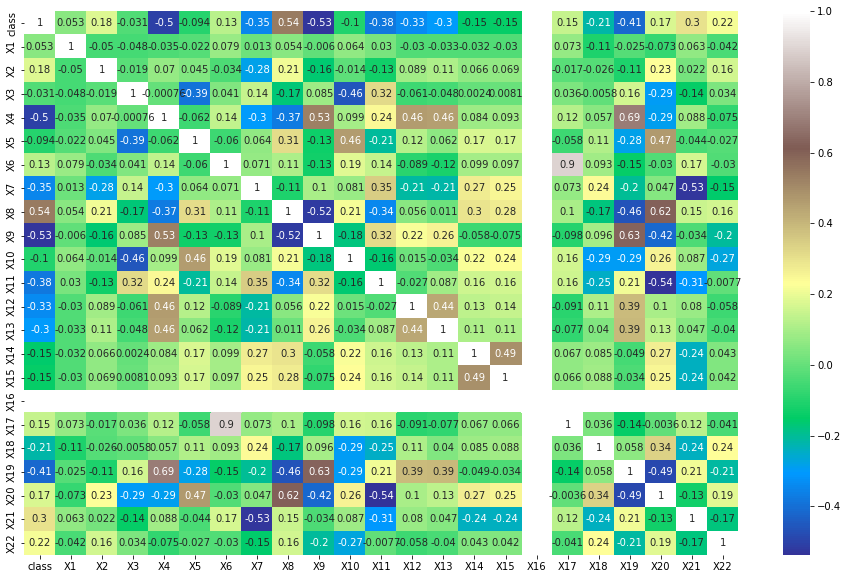

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),annot=True,cmap='terrain')
plt.show()

According to heatmap shown abow ...the variable X16 remain constant throughout the dataset, and feature variable X6 and X17 are highly correlated , so feature variable X16 ans X17 can be eliminated, so as to do dimension reduction

In [ ]:
dataset=dataset.drop(['X16','X17'], axis = 1)

In [ ]:
dataset.to_csv('mushroom_new.csv', index=False)

#Model Building and Model Testing

In [ ]:
# Remove label coloumn data from the dataset to avoid cheating in case of model formation, 
# and rest dataset is stored in x variable and label is stored in y variable

x=dataset.drop(['class'],axis=1)
y=dataset['class']

print("Shape of x : ", x.shape)
print("Shape of y : ", y.shape)

Shape of x :  (8124, 20)
Shape of y :  (8124,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=13)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Importing confusion_matrix, accuracy_score, classification_report from sklearn.metrics library to obtain confusion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

###Naive Bayes Classifier

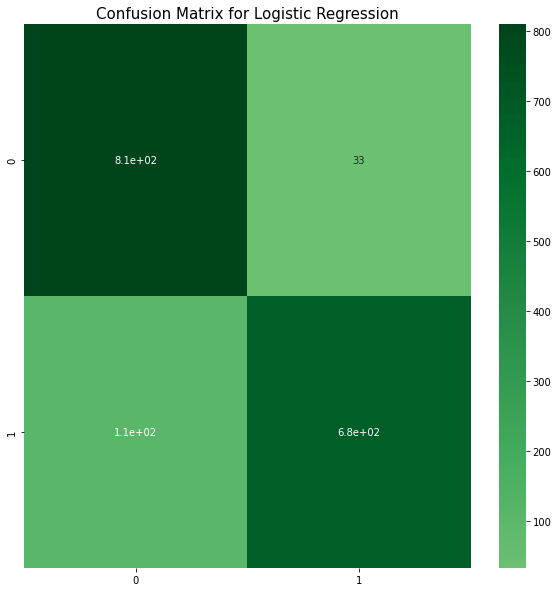

Accuracy of the Naive Bayes Classifier model in % is: 91.45
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       842
           1       0.95      0.86      0.91       783

    accuracy                           0.91      1625
   macro avg       0.92      0.91      0.91      1625
weighted avg       0.92      0.91      0.91      1625



In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Specifiy the model
model= GaussianNB()


# Fit the model to the data
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", center=0.6)
plt.title("Confusion Matrix for Logistic Regression", fontsize=15)
plt.show()

#To check accuracy
print("Accuracy of the Naive Bayes Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)



###Logistic Regression

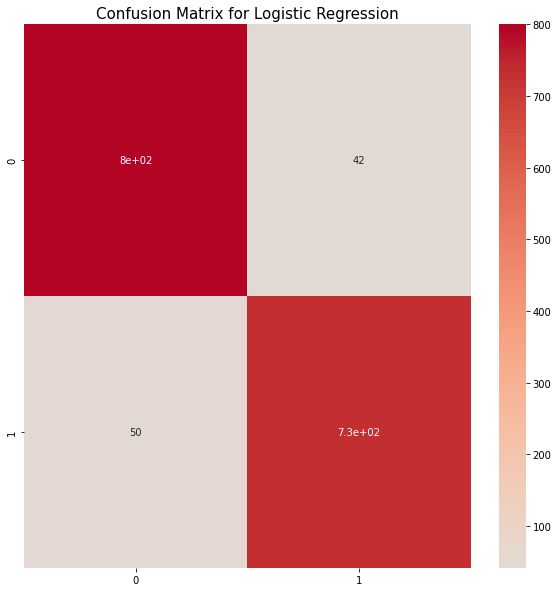

Accuracy of the Logistic Regression model in % is: 94.34
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       842
           1       0.95      0.94      0.94       783

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Specifiy the model
model= LogisticRegression(C = 1e08) #Choose c as large


# Fit the model to the data
model.fit(x_train, y_train)
y_pred =model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", center=0.6)
plt.title("Confusion Matrix for Logistic Regression", fontsize=15)
plt.show()

#To check accuracy
print("Accuracy of the Logistic Regression model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

###Decision Tree Classifier

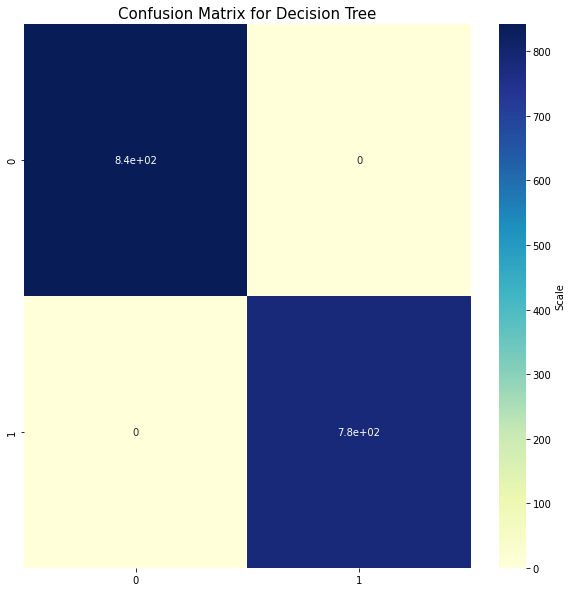

Accuracy of the Decision Tree Classifier model in % is: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train) #Training
y_pred = model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, cmap='Wistia')
sns.heatmap(cm, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix for Decision Tree", fontsize=15)
plt.show()

#To check accuracy
print("Accuracy of the Decision Tree Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

###Support Vector Machine Classifier

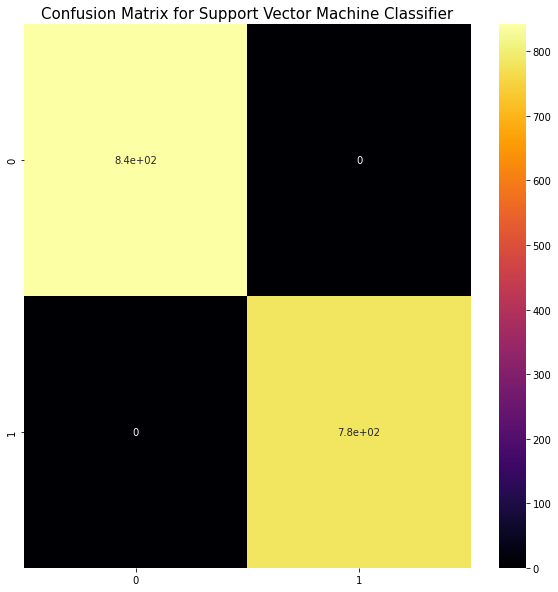

Accuracy of the Support Vector Machine model  in % is: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Support Vector Machine Classifier
#from sklearn import svm
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train) #Training
y_pred = model.predict(x_test)
model.score(x_test,y_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="inferno")
plt.title("Confusion Matrix for Support Vector Machine Classifier", fontsize=15)
plt.show()

#To check accuracy
print("Accuracy of the Support Vector Machine model  in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr) 

###Random Forest Classifier

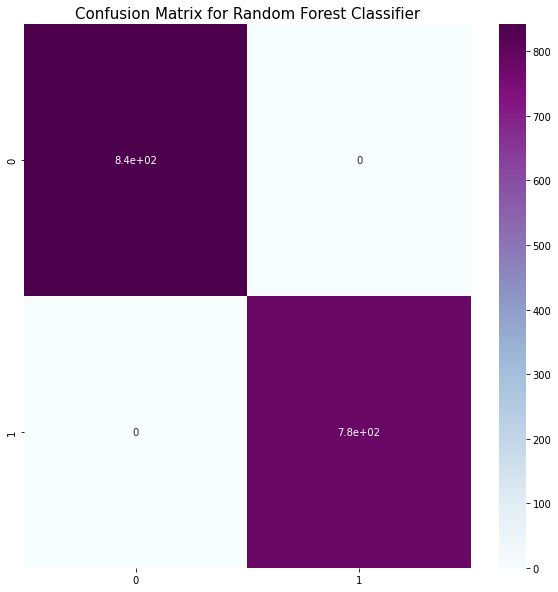

Accuracy of the Random Forest Classifier model in % is: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train) #Training
y_pred = model.predict(x_test)
model.score(x_test,y_test)



# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, cmap='Wistia')
#sns.heatmap(cm, annot=True,  vmin=0.0, vmax=100.0, fmt='.2f')
sns.heatmap(cm, annot=True, cmap="BuPu")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=15)
plt.show()

#To check accuracy
print("Accuracy of the Random Forest Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

###X G Boost Classifier

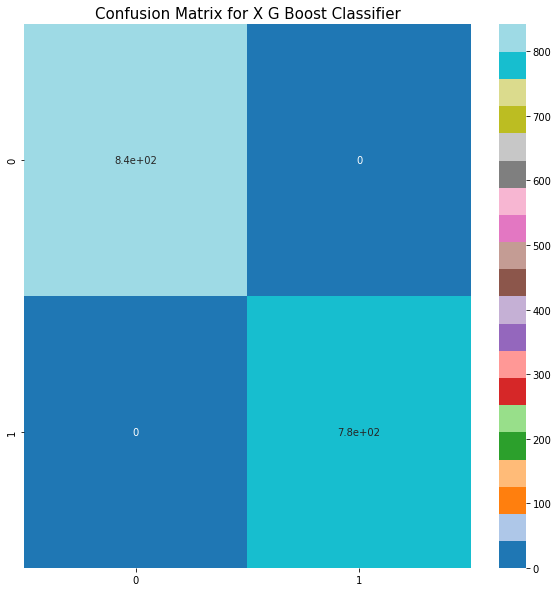

Accuracy of the X G Boost Classifier model in % is: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#X G Boost Classifier
from xgboost import XGBClassifier

# Specifiy the model
model= XGBClassifier()


# Fit the model to the data
model.fit(x_train, y_train)
y_pred =model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test, y_pred)
cmap = "tab20"
sns.heatmap(cm, annot=True, cmap=cmap)
plt.title("Confusion Matrix for X G Boost Classifier", fontsize=15)
plt.show()

#To check accuracy
print("Accuracy of the X G Boost Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)